In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append("../src")
from utils.utils import query_db

In [2]:
db_path = '../data/movies.db'

In [3]:
movies_df = query_db("SELECT * FROM movies;", db_path)
movies_df

,id,title,release_date,original_language,adult,video,popularity,overview,vote_average,vote_count
0,1,Final Destination Bloodlines,2025-05-14,en,0,0,1075.9213,"Plagued by a violent recurring nightmare, coll...",7.118,777
1,2,STRAW,2025-06-05,en,0,0,501.8777,What will be her last straw? A devastatingly b...,8.101,467
2,3,Predator: Killer of Killers,2025-06-05,en,0,0,438.9421,While three of the fiercest warriors in human ...,7.981,515
3,4,Lilo & Stitch,2025-05-17,en,0,0,430.0868,The wildly funny and touching story of a lonel...,7.088,647
4,5,The Accountant²,2025-04-23,en,0,0,378.3110,"When an old acquaintance is murdered, Wolff is...",7.200,804
...,...,...,...,...,...,...,...,...,...,...
5299,5300,Life Is Salty!,2025-05-09,my,0,0,0.0000,,0.000,0
5300,5301,"Se isso é cinema, me desculpe",2025-06-07,pt,0,0,0.0000,,0.000,0
5301,5302,The Cold Kill,2025-05-30,en,0,0,0.0000,"""The Cold Kill"" is a tense short film that fol...",0.000,0
5302,5303,Johnny Kraftmeile vs the army of super-reptiloids,2025-05-09,de,0,0,0.0000,When Johnny Kraftmeile kills some henchmen of ...,0.000,0


In [4]:
movies_df.describe()

,id,release_date,adult,video,popularity,vote_average,vote_count
count,5304.000000,5288,5304.0,5304.0,5304.000000,5304.000000,5304.000000
mean,2652.500000,2024-10-04 03:02:43.388804608,0.0,0.0,1.822623,1.650952,43.886124
min,1.000000,1912-05-30 00:00:00,0.0,0.0,0.000000,0.000000,0.000000
25%,1326.750000,2025-05-12 00:00:00,0.0,0.0,0.026100,0.000000,0.000000
50%,2652.500000,2025-05-23 00:00:00,0.0,0.0,0.062100,0.000000,0.000000
75%,3978.250000,2025-06-05 00:00:00,0.0,0.0,0.205850,0.000000,0.000000
max,5304.000000,2025-06-26 00:00:00,0.0,0.0,1075.921300,10.000000,15639.000000
std,1531.277245,NaN,0.0,0.0,21.941865,3.175613,476.573554


In [5]:
query_db("PRAGMA table_info(movies)", db_path)

,cid,name,type,notnull,dflt_value,pk
0,0,id,INTEGER,1,None,1
1,1,title,TEXT,1,None,0
2,2,release_date,DATE,0,None,0
3,3,original_language,CHAR(2),0,None,0
4,4,adult,INTEGER,0,None,0
5,5,video,INTEGER,0,None,0
6,6,popularity,FLOAT,0,None,0
7,7,overview,TEXT,0,None,0
8,8,vote_average,FLOAT,0,None,0
9,9,vote_count,INTEGER,0,None,0


In [8]:
def find_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers.sort_values(by=column, inplace=True)
    return outliers

In [4]:
#Top languages of current movies
query = """
    SELECT original_language, COUNT(original_language) as num_movies
    FROM movies
    GROUP BY original_language
    ORDER BY num_movies DESC
    LIMIT 10;
"""
top_languages = query_db(query, db_path)
top_languages

,original_language,num_movies
0,en,2545
1,fr,420
2,es,385
3,pt,291
4,zh,165
5,de,140
6,it,119
7,ja,111
8,ru,79
9,ko,71


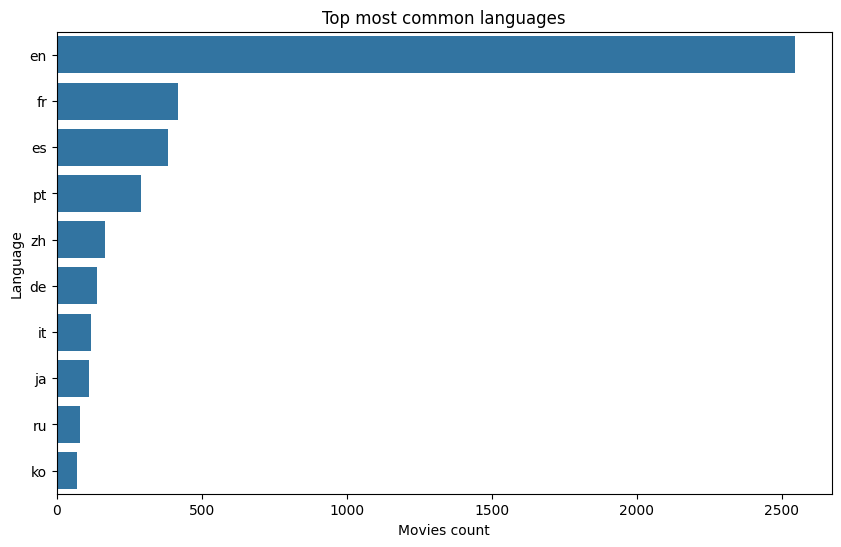

In [5]:
# Plot the top languages
plt.figure(figsize=(10, 6))
sns.barplot(data=top_languages, x='num_movies', y='original_language')
plt.title('Top most common languages')
plt.xlabel('Movies count')
plt.ylabel('Language')
plt.show()

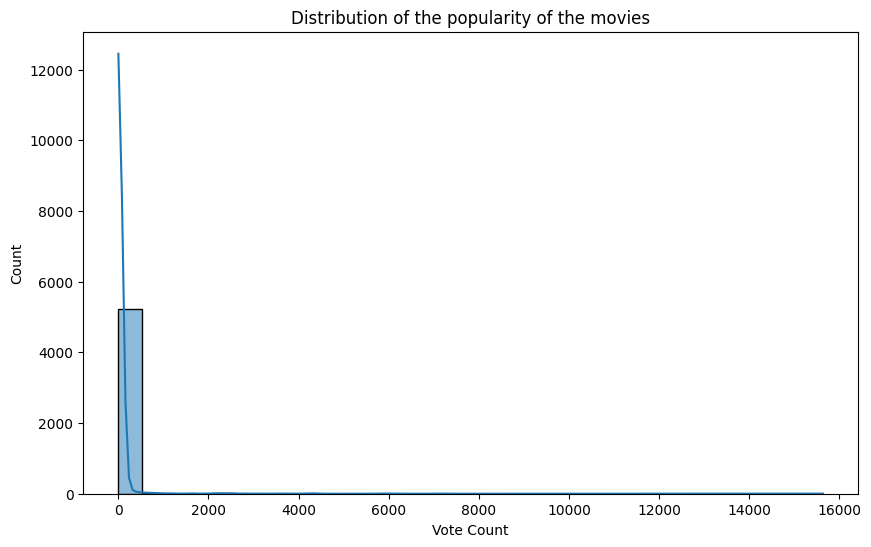

In [6]:
# Plot the distribution of the vote_count
plt.figure(figsize=(10, 6))
sns.histplot(movies_df['vote_count'], bins=30, kde=True)
plt.title('Distribution of the popularity of the movies')
plt.xlabel('Vote Count')
plt.ylabel('Count')
plt.show()

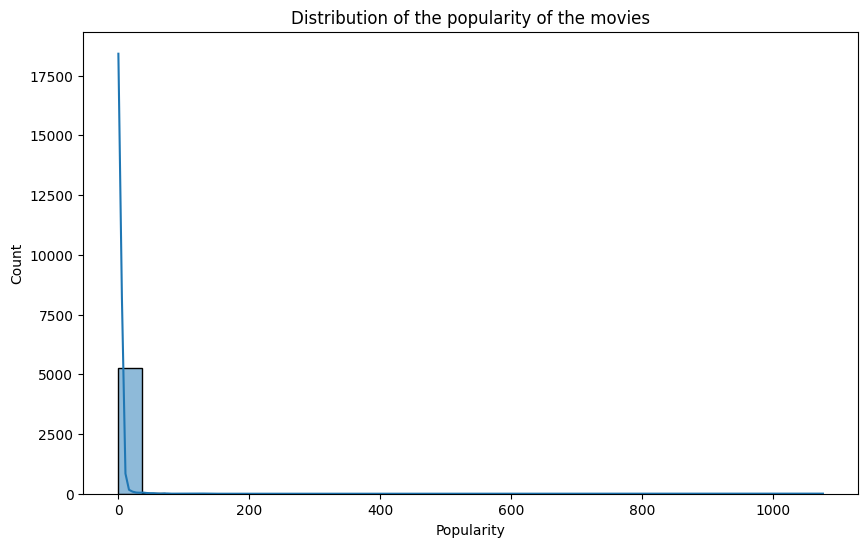

In [7]:
# Plot the distribution of the popularity of the movies
plt.figure(figsize=(10, 6))
sns.histplot(movies_df['popularity'], bins=30, kde=True)
plt.title('Distribution of the popularity of the movies')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()

## Top movies by popularity

In [ ]:
query = """
    SELECT title, popularity
    FROM movies
    ORDER BY popularity DESC
    LIMIT 10;
"""
popular_movies = query_db(query, db_path)
popular_movies

In [ ]:
sns.barplot(x='popularity', y='title', data=popular_movies)

## Top languages by popularity

In [ ]:
query = """
    SELECT original_language, AVG(popularity) AS avg_popularity
    FROM movies
    GROUP BY original_language
    ORDER BY avg_popularity DESC
    LIMIT 10;
"""
popular_languages = query_db(query, db_path)
popular_languages

In [ ]:
sns.barplot(x='avg_popularity', y='original_language', data=popular_languages)